# ANN for regression

In [21]:
# Every line of code, where I didnt put a source or marked it as AI code, is from moodle and the professors Github repository


# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers;  # ; is used to suppress output, recommended by AI

### Load the dataset

In [22]:
# source: https://data.world/nrippner/ols-regression-challenge/workspace/file?filename=cancer_reg.csv

df = pd.read_csv('cancer_reg.csv', encoding="latin1") # encoding was recommended by AI, utf-8 gave an error

In [23]:
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.00,469,164.90,489.80,61898,260131,11.20,499.75,"(61494.5, 125635]",39.30,...,NaN,41.60,32.90,14.00,81.78,2.59,4.82,1.84,52.86,6.12
1,173.00,70,161.30,411.60,48127,43269,18.60,23.11,"(48021.6, 51046.4]",33.00,...,53.80,43.60,31.10,15.30,89.23,0.97,2.25,3.74,45.37,4.33
2,102.00,50,174.70,349.70,49348,21026,14.60,47.56,"(48021.6, 51046.4]",45.00,...,43.50,34.90,42.10,21.10,90.92,0.74,0.47,2.75,54.44,3.73
3,427.00,202,194.80,430.40,44243,75882,17.10,342.64,"(42724.4, 45201]",42.80,...,40.30,35.00,45.30,25.00,91.74,0.78,1.16,1.36,51.02,4.60
4,57.00,26,144.40,350.10,49955,10321,12.50,0.00,"(48021.6, 51046.4]",48.30,...,43.90,35.10,44.00,22.70,94.10,0.27,0.67,0.49,54.03,6.80


In [24]:
# check dimensions of the data

print(df.shape) # generated by AI, I asked what method shows the dimensions of a dataframe

(3047, 34)


In [25]:
# Check for missing values

df.isna().sum()

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [26]:
# There are 3 columns with missing values (PctSomeCol18_24, PctEmployed_16over, PctPrivateCoverageAlone)
# Since PctSomeCol18_24 has 2285 missing values and the data only has 3074 rows (74.99% according to the source)
# we cannot drop the rows with missing values
# Instead we will replace the missing values with the mean of the column

# needed this to find how to drop a column, I got an error because I forgot using axis=1: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
df = df.drop("PctSomeCol18_24", axis=1) 

# generated by AI, searched in ChatGPT instead of Google and I knew and understood the syntax
df['PctEmployed16_Over'] = df['PctEmployed16_Over'].fillna(df['PctEmployed16_Over'].mean())
df['PctPrivateCoverageAlone'] = df['PctPrivateCoverageAlone'].fillna(df['PctPrivateCoverageAlone'].mean()) # 

In [27]:
# The column 'Geography' consists of different cities in the format city, state
# Every column has to be numeric, so we have to change the locations into categorial values
# Since the city is not relevant for the model and too complicated to handle, we will extract the state
# and categorize every state into 'north', 'south', 'east', 'west' with the help of AI


df["Geography"] = df["Geography"].str.split(",").str[-1].str.strip() # generated by AI

In [28]:
# generated by AI

# Mapping: state -> region
region_map = {
    # --- NORTH (≈ Midwest + New England Nord) ---
    "North Dakota": "North",
    "South Dakota": "North",
    "Minnesota": "North",
    "Wisconsin": "North",
    "Michigan": "North",
    "Iowa": "North",
    "Illinois": "North",
    "Indiana": "North",
    "Ohio": "North",
    "Nebraska": "North",
    "Kansas": "North",
    "Missouri": "North",
    "Vermont": "North",
    "New Hampshire": "North",
    "Maine": "North",
    "Massachusetts": "North",
    "Connecticut": "North",
    "Rhode Island": "North",

    # --- EAST (≈ Mid-Atlantic) ---
    "New York": "East",
    "New Jersey": "East",
    "Pennsylvania": "East",
    "Delaware": "East",
    "Maryland": "East",
    "District of Columbia": "East",
    "Virginia": "East",
    "West Virginia": "East",

    # --- SOUTH ---
    "Texas": "South",
    "Oklahoma": "South",
    "Arkansas": "South",
    "Louisiana": "South",
    "Mississippi": "South",
    "Alabama": "South",
    "Georgia": "South",
    "Florida": "South",
    "South Carolina": "South",
    "North Carolina": "South",
    "Tennessee": "South",
    "Kentucky": "South",

    # --- WEST ---
    "California": "West",
    "Oregon": "West",
    "Washington": "West",
    "Nevada": "West",
    "Arizona": "West",
    "Utah": "West",
    "Colorado": "West",
    "Wyoming": "West",
    "Montana": "West",
    "Idaho": "West",
    "New Mexico": "West",
    "Alaska": "West",
    "Hawaii": "West",
}


df["Geography"] = df["Geography"].str.split(",").str[-1].str.strip()
df["Geography"] = df["Geography"].map(region_map)

print(df["Geography"].value_counts()) 
print(df["Geography"].isna().sum())


Geography
South    1175
North    1096
West      418
East      358
Name: count, dtype: int64
0


In [29]:

from sklearn.preprocessing import OneHotEncoder

variables = ['Geography']

encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [30]:
# the column 'binnedInc' is categorial and uses 10 income groups
# We need only one number per cell, so every income group will be mapped to a number from 1 to 10
# We can use numbers here because there is an order in the imcome groups

# I used AI to create the bin_map by giving it the unique values. 

bin_map = {
    '[22640, 34218.1]': 1,
    '(34218.1, 37413.8]': 2,
    '(37413.8, 40362.7]': 3,
    '(40362.7, 42724.4]': 4,
    '(42724.4, 45201]': 5,
    '(45201, 48021.6]': 6,
    '(48021.6, 51046.4]': 7,
    '(51046.4, 54545.6]': 8,
    '(54545.6, 61494.5]': 9,
    '(61494.5, 125635]': 10
}

df["binnedInc"] = df["binnedInc"].astype(str).map(bin_map) # used AI to fix error, I forgot to convert everything to a str

df["binnedInc"].unique() # test if it worked


array([10,  7,  5,  8,  3,  4,  9,  2,  1,  6])

In [31]:
# dimensions after transformations

df.shape

(3047, 36)

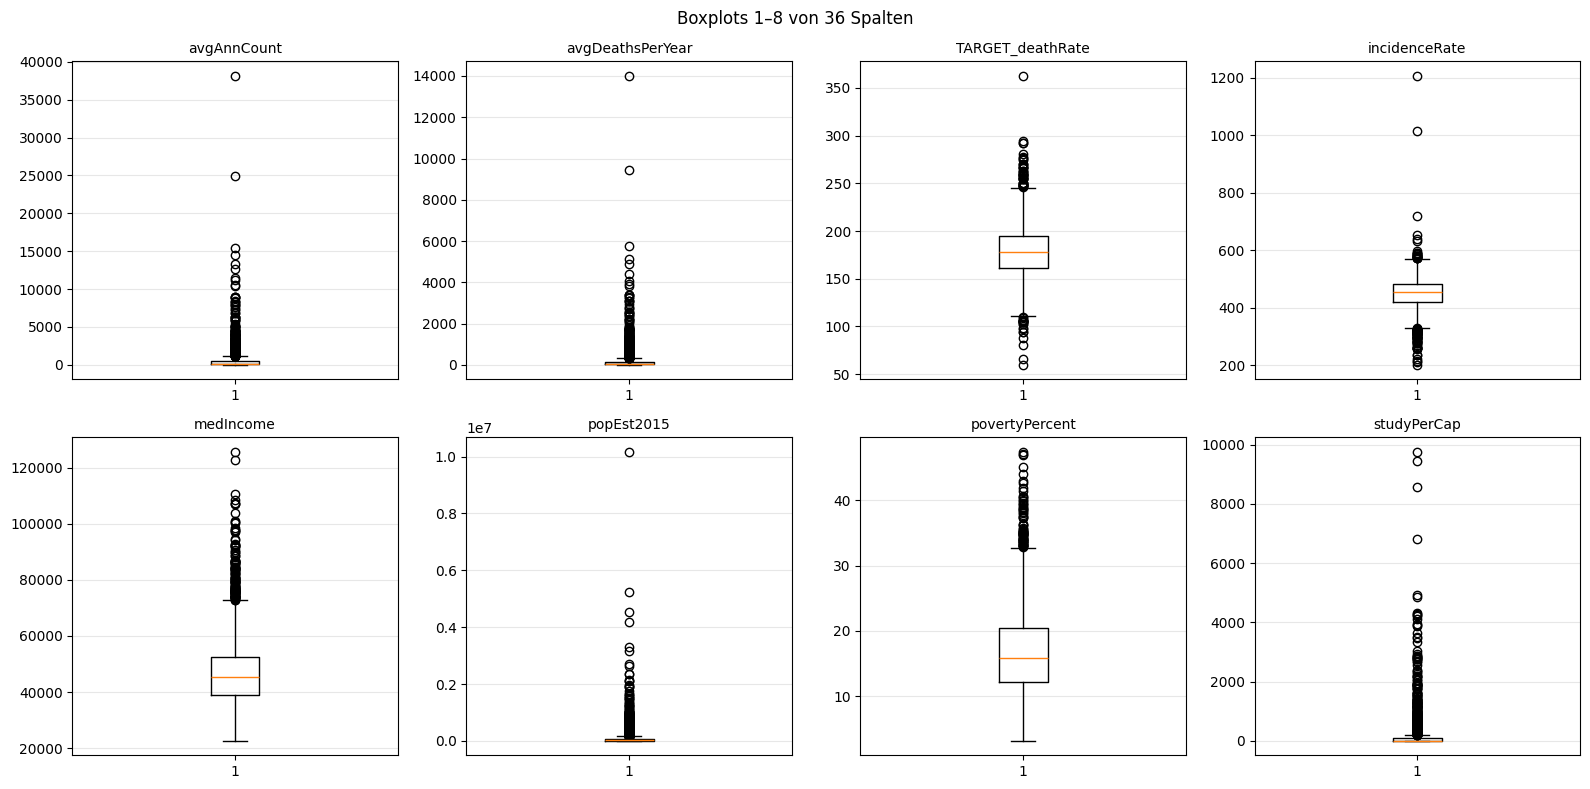

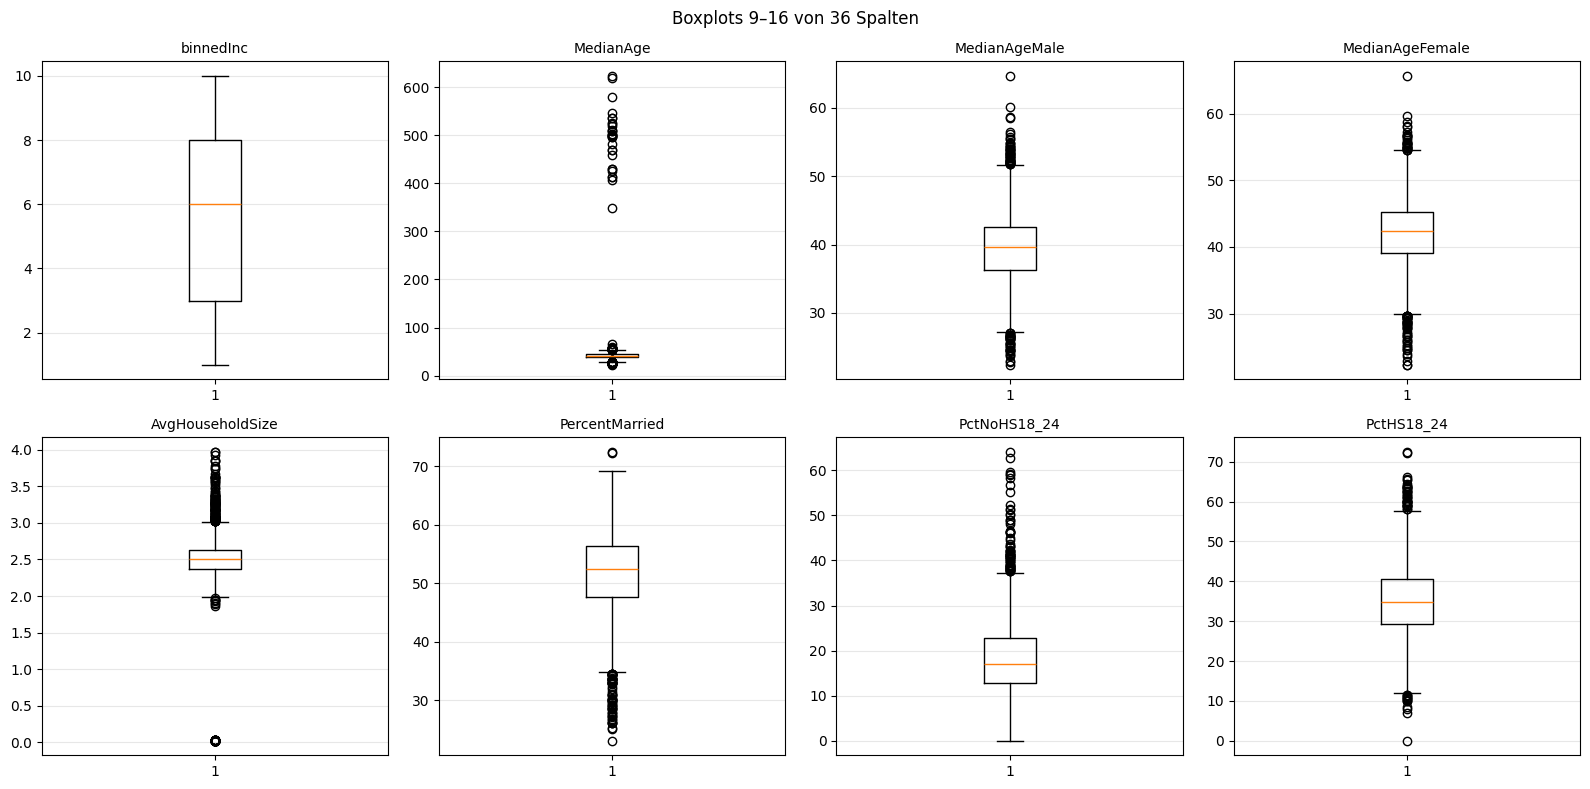

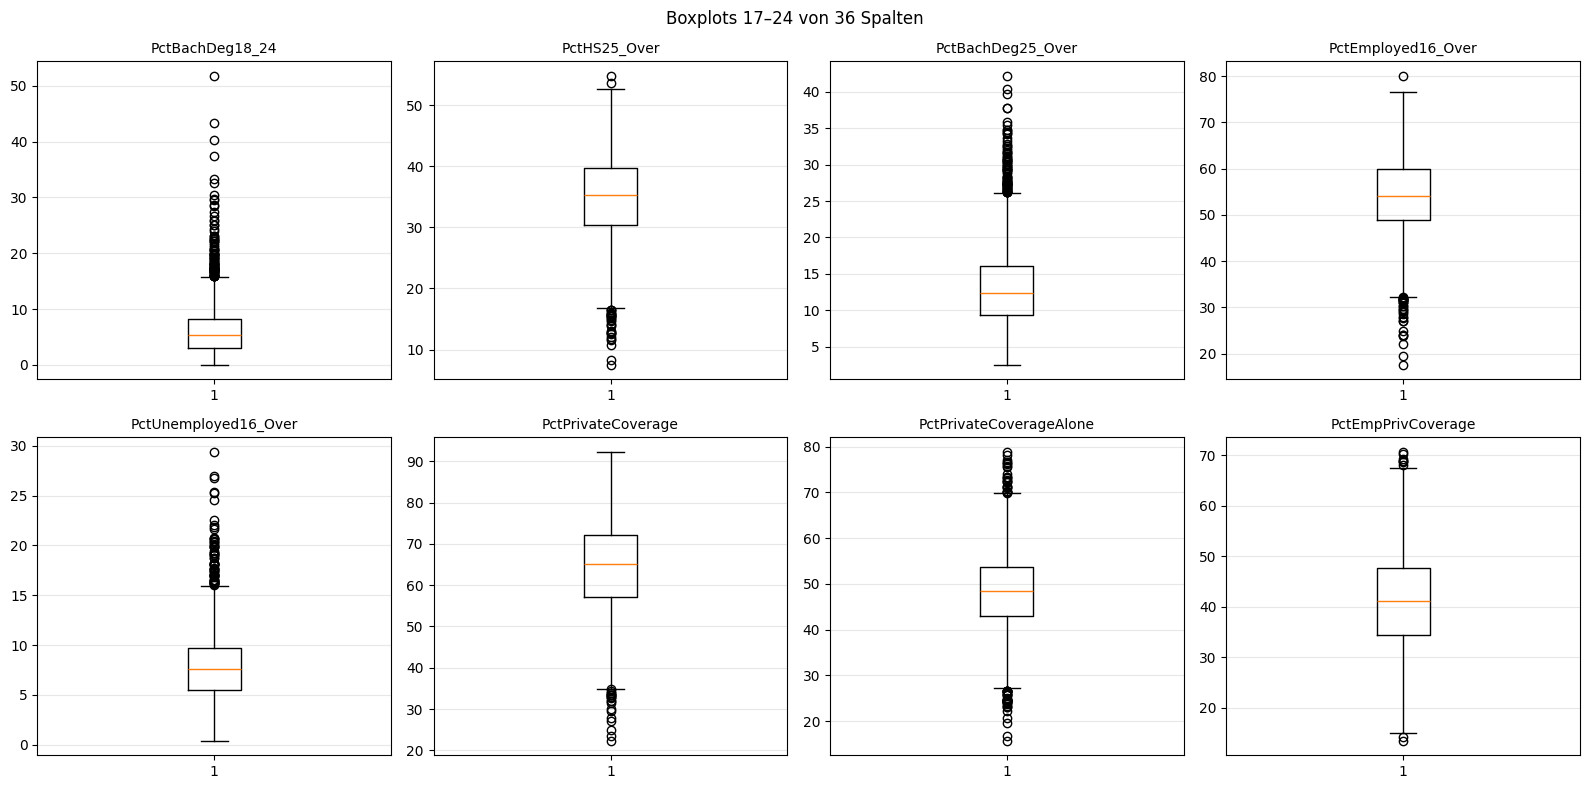

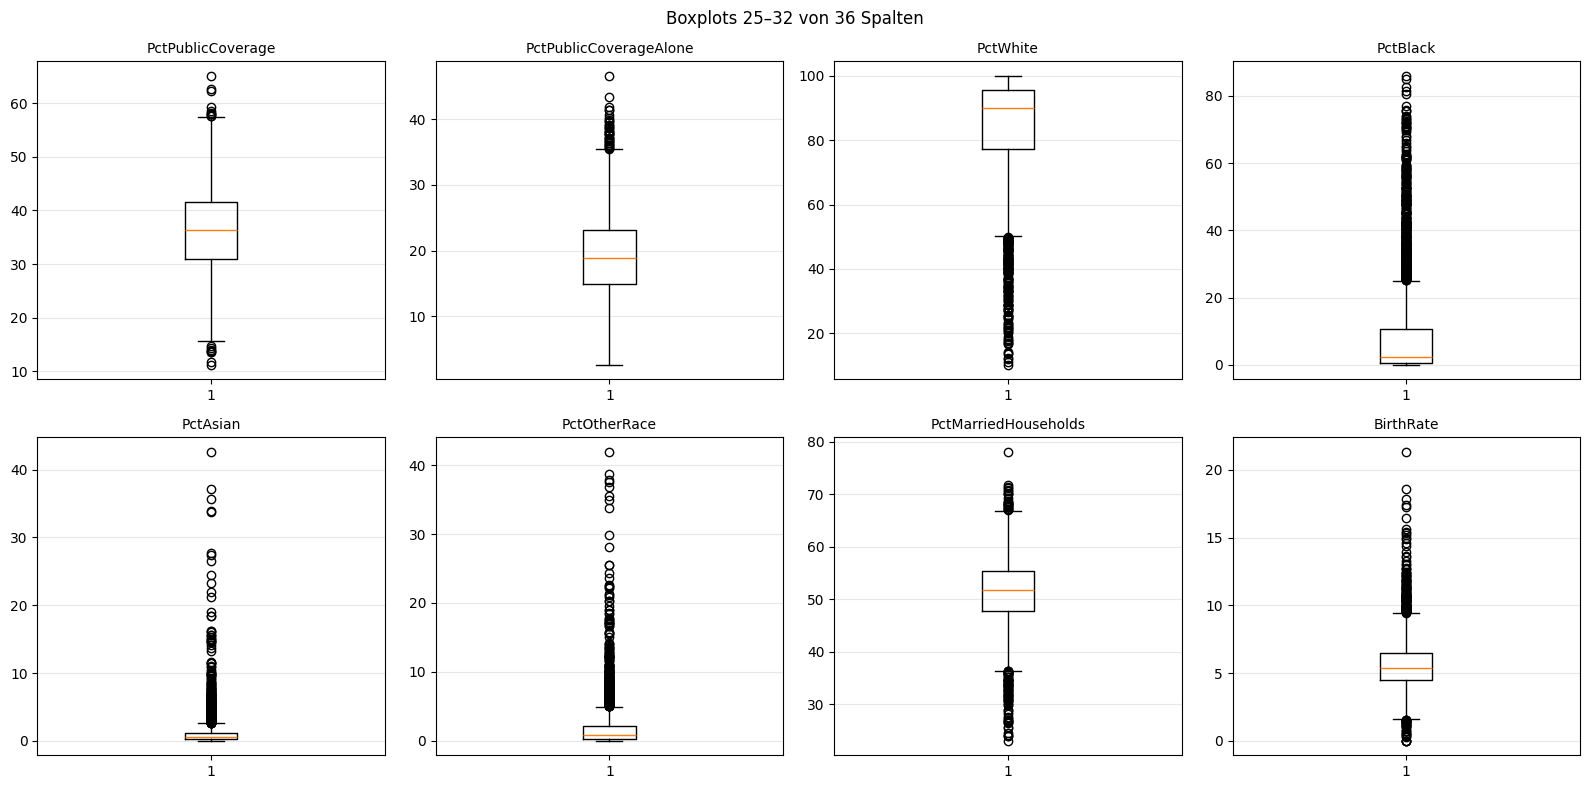

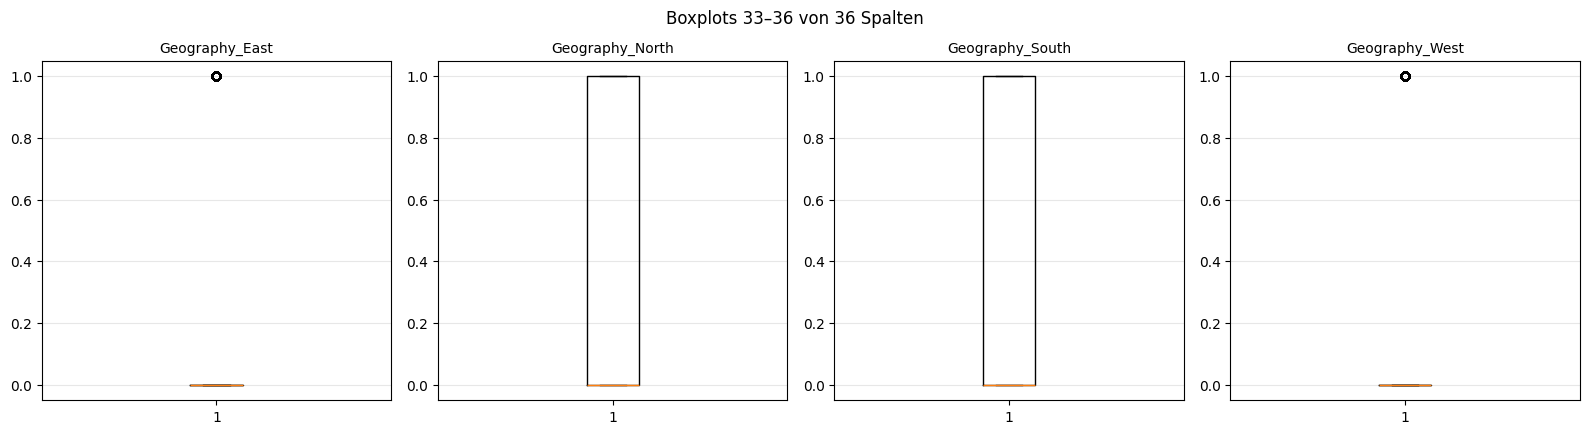

In [32]:
# generated by AI, for every column a boxplot to see outliers
# There are a lot of outliers in the most columns so there is no normal distribution most of the time
# I will leave the outliers for now since there are a lot of them so they might not distort means

import numpy as np
import matplotlib.pyplot as plt


df_num = df.select_dtypes(include=np.number)
cols = df_num.columns.tolist()

per_fig = 8                 
rows, cols_per_row = 2, 4   

for start in range(0, len(cols), per_fig):
    chunk = cols[start:start+per_fig]
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(16, 8))
    axes = axes.ravel()

    for ax, col in zip(axes, chunk):
        data = df_num[col].dropna().values
        ax.boxplot(data, vert=True, showfliers=True)
        ax.set_title(col, fontsize=10)
        ax.grid(True, axis='y', alpha=0.3)


    for j in range(len(chunk), len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle(f"Boxplots {start+1}–{start+len(chunk)} von {len(cols)} Spalten", y=0.98)
    plt.tight_layout()
    plt.show()


In [33]:
# I check, how the correlation between the independend variables and the target variable is
# The highest correlation is 0.45 wo the target variable seems independent

corr_matrix = df.corr()['TARGET_deathRate']
corr_matrix.sort_values(ascending=False)

TARGET_deathRate           1.00
incidenceRate              0.45
PctPublicCoverageAlone     0.45
povertyPercent             0.43
PctHS25_Over               0.40
PctPublicCoverage          0.40
PctUnemployed16_Over       0.38
Geography_South            0.31
PctHS18_24                 0.26
PctBlack                   0.26
PctNoHS18_24               0.09
Geography_East             0.02
MedianAgeFemale            0.01
MedianAge                  0.00
MedianAgeMale             -0.02
studyPerCap               -0.02
AvgHouseholdSize          -0.04
BirthRate                 -0.09
avgDeathsPerYear          -0.09
Geography_North           -0.12
popEst2015                -0.12
avgAnnCount               -0.14
PctWhite                  -0.18
PctAsian                  -0.19
PctOtherRace              -0.19
PercentMarried            -0.27
PctEmpPrivCoverage        -0.27
PctBachDeg18_24           -0.29
PctMarriedHouseholds      -0.29
Geography_West            -0.30
PctPrivateCoverageAlone   -0.33
PctPriva

### X/y Splitting

A dataset has to be split into the dependend and independend variable (the variable which we try to predict)

Our target variable here is "TARGET_deathRate". 

In [34]:


X = df.drop("TARGET_deathRate", axis=1)  
y = df["TARGET_deathRate"]

print(X.head())




   avgAnnCount  avgDeathsPerYear  incidenceRate  medIncome  popEst2015  \
0      1397.00               469         489.80      61898      260131   
1       173.00                70         411.60      48127       43269   
2       102.00                50         349.70      49348       21026   
3       427.00               202         430.40      44243       75882   
4        57.00                26         350.10      49955       10321   

   povertyPercent  studyPerCap  binnedInc  MedianAge  MedianAgeMale  ...  \
0           11.20       499.75         10      39.30          36.90  ...   
1           18.60        23.11          7      33.00          32.20  ...   
2           14.60        47.56          7      45.00          44.00  ...   
3           17.10       342.64          5      42.80          42.20  ...   
4           12.50         0.00          7      48.30          47.80  ...   

   PctWhite  PctBlack  PctAsian  PctOtherRace  PctMarriedHouseholds  \
0     81.78      2.59      

### Fisher-Score

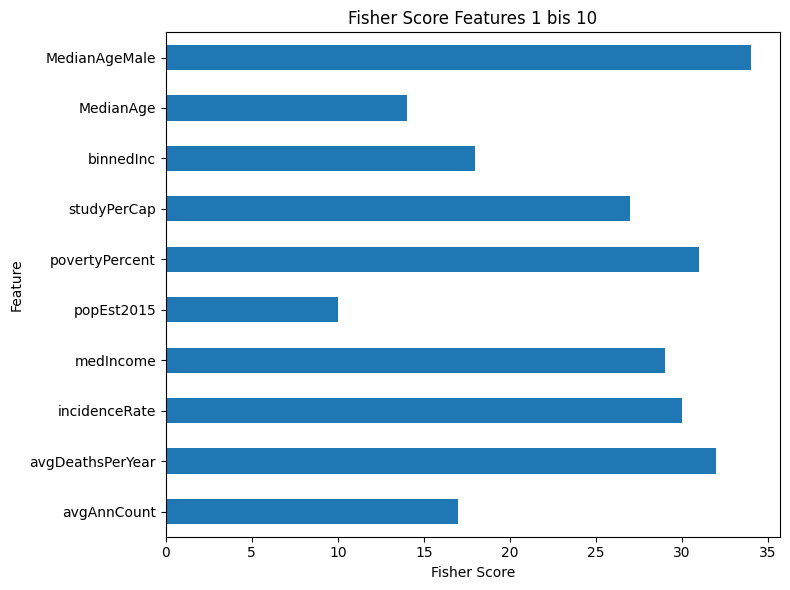

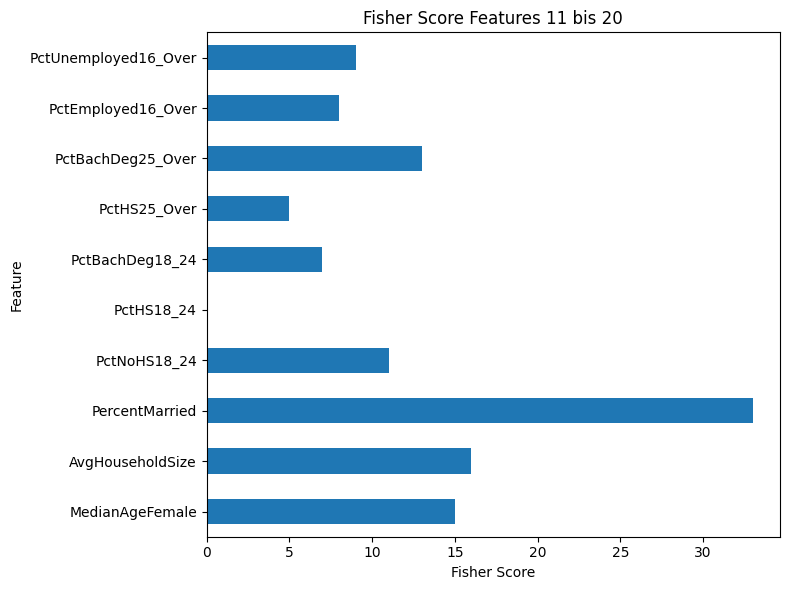

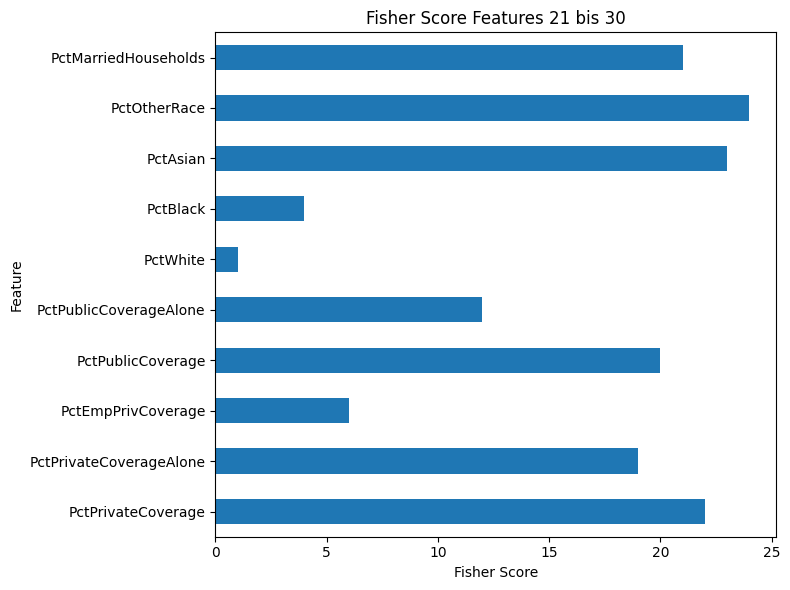

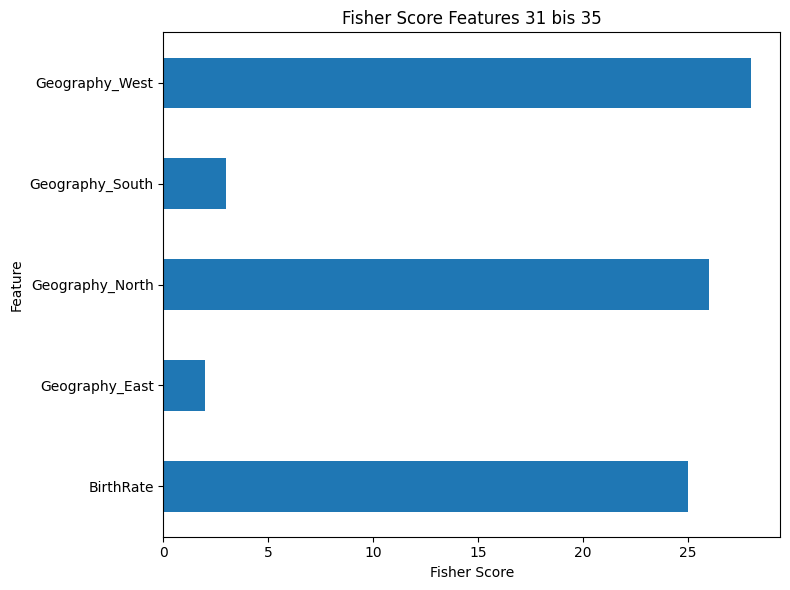

In [35]:
# fisher score
from skfeature.function.similarity_based import fisher_score


ranks = fisher_score.fisher_score(X.values, y.values)


feat_importances = pd.Series(ranks, X.columns)


# used AI to make more than one plot because there was not enough space for all columns
n_features = len(feat_importances)


step = 10


for i in range(0, n_features, step):
    subset = feat_importances.iloc[i:i+step] 
    
    plt.figure(figsize=(8,6))
    subset.plot(kind='barh')
    plt.title(f"Fisher Score Features {i+1} bis {min(i+step, n_features)}")
    plt.xlabel("Fisher Score")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()





### Fisherscore Interpretation

The fisher score shows, which variable has more on an impact on the target variable.
A variable with a higher score has a bigger impact on the target variable than a variable with a lower score.
The values impact the target value the most are medianAgeMale, Geography_West and PercentMarried 

### SelectKBest-Score

In [36]:
# SelectKBest-score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)


chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))


best_features = chi_2_features.fit(X_cat,y.astype(int))

pd.options.display.float_format = '{:.2f}'.format


df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
4,popEst2015,192220667.55
3,medIncome,2349356.91
0,avgAnnCount,760689.47
6,studyPerCap,304557.00
1,avgDeathsPerYear,224069.21
26,PctBlack,10839.76
8,MedianAge,10345.70
2,incidenceRate,6346.02
27,PctAsian,2532.25
28,PctOtherRace,2252.49


### Interpretation of the SelectKBest-Score

The SelectKBest-Score does the same as the fisher-score does, just calculating it different
According to the SelectKBest-Score, the most impactful variables are popEst2015, medIncome and avgAnnCount. 
Its interesting that medIncome seems to have a high impact here but according to the fisherscore the impact is on the lower side

### VIF

The VIF is needed to see if independend variables do correlate with each other, which could have a negative impact on the model

In [37]:
# pip install statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor 


vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  

vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  



print(vif_data.sort_values(by='VIF'))

# Results: only the Geography columes seem to have some a dependency, which is expected.

                    feature    VIF
8                 MedianAge   1.02
6               studyPerCap   1.06
30                BirthRate   1.22
2             incidenceRate   1.31
11         AvgHouseholdSize   1.38
28             PctOtherRace   1.58
14               PctHS18_24   1.66
13             PctNoHS18_24   1.73
27                 PctAsian   2.04
15          PctBachDeg18_24   2.05
19     PctUnemployed16_Over   2.74
16             PctHS25_Over   4.01
21  PctPrivateCoverageAlone   4.76
17        PctBachDeg25_Over   5.68
18       PctEmployed16_Over   5.82
26                 PctBlack   6.06
25                 PctWhite   7.30
22       PctEmpPrivCoverage   8.03
7                 binnedInc   8.42
29     PctMarriedHouseholds   8.92
5            povertyPercent   9.84
9             MedianAgeMale   9.85
0               avgAnnCount  10.08
3                 medIncome  10.13
12           PercentMarried  10.92
10          MedianAgeFemale  10.94
20       PctPrivateCoverage  19.54
24   PctPublicCovera

### Split data into train, test and validation data

the data is split into 70% train data, 15% in test and 15% in validation data, according to the lecture content. 
In practice this also depends on the purpose of the model, as well as the data itself 

In [38]:


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)





In [39]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler()  # I tried MinMaxScaler() and QuantileTransformer() but StandardScaler() worked best R-squared result
x_scaler.fit(X_train)


y_scaler = StandardScaler()
y_scaler.fit(y_train.values.reshape(-1, 1))

X_train = x_scaler.transform(X_train)
X_val = x_scaler.transform(X_val)
X_test = x_scaler.transform(X_test)

y_train = y_scaler.transform(y_train.values.reshape(-1, 1))
y_val = y_scaler.transform(y_val.values.reshape(-1, 1))
y_test  = y_scaler.transform(y_test.values.reshape(-1, 1))


In [40]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.layers import Dropout


variable_amount = len(X.columns)


mc = ModelCheckpoint('best_model_regression3_housing_scalers.keras', monitor='val_loss', mode='min', save_best_only=True)

# source: https://keras.io/api/callbacks/early_stopping/
es = EarlyStopping(monitor='loss', patience=3)

# source: https://keras.io/api/callbacks/reduce_lr_on_plateau/
rlrop = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

rate = 0.2 # AI explained me how the rate works and suggested it should be between 0.2 and 0.5. i chose the lowest

# https://keras.io/api/layers/regularization_layers/dropout/
do = Dropout( rate, noise_shape=None, seed=None)

callback_list = [mc, es, rlrop]

# I experimented with different values, numbers arround 100, 50, 25, 1 gave me the best results

model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(variable_amount,)),
        layers.Dense(100, activation="relu", kernel_regularizer=keras.regularizers.l1_l2(l1=0.105, l2=0.105)),
        layers.Dropout(0.2),
        layers.Dense(50, activation="relu"),
        layers.Dense(25, activation="relu"),
        layers.Dense(1)
    ]
)


model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00125), loss='mse')


model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\normalization\batch_normalization.py:142: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 35)             │           140 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,091 (39.42 KB)

 Trainable params: 10,021 (39.14 KB)

 Non-trainable params: 70 (280.00 B)

In [41]:
model.fit(x=X_train, y=y_train, epochs=800, validation_data=(X_val, y_val), callbacks=callback_list)

Epoch 1/800
67/67 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 29.3298 - val_loss: 16.4766 - learning_rate: 0.0012
Epoch 2/800
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9816 - val_loss: 3.4850 - learning_rate: 0.0012
Epoch 3/800
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5705 - val_loss: 1.0401 - learning_rate: 0.0012
Epoch 4/800
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8818 - val_loss: 0.8516 - learning_rate: 0.0012
Epoch 5/800
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8284 - val_loss: 0.9092 - learning_rate: 0.0012
Epoch 6/800
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8160 - val_loss: 0.8266 - learning_rate: 0.0012
Epoch 7/800
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7910 - val_loss: 0.8189 - learning_rate: 0.0012
Epoch 8/800
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7805 - val_loss: 0.8355 - learning_rate: 0.0012
Epoch 9/800
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7693 - val_loss: 0.7809 - learning_rate: 0.0012
Epoch 10/800
67/6

<Axes: >

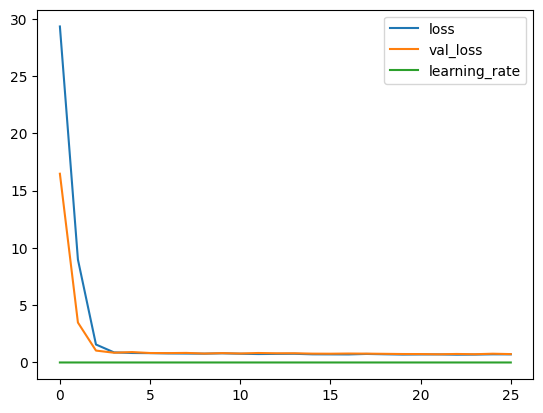

In [42]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [43]:

test_predictions = model.predict(X_test)


test_predictions_table = pd.Series(test_predictions.reshape(len(y_test),))
pred_df = pd.DataFrame(np.asarray(y_test), columns=['Test True Y'])
pred_df = pd.concat([pred_df, test_predictions_table], axis=1)
pred_df.columns = ['Test True Y', 'Model Predictions']

pred_df.head(10)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


,Test True Y,Model Predictions
0,-0.50,-0.89
1,0.59,-0.03
2,-0.17,-0.41
3,-0.23,0.69
4,0.10,-0.45
5,1.42,1.14
6,-0.68,-0.58
7,0.21,0.87
8,0.11,-0.08
9,-0.14,-0.18


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

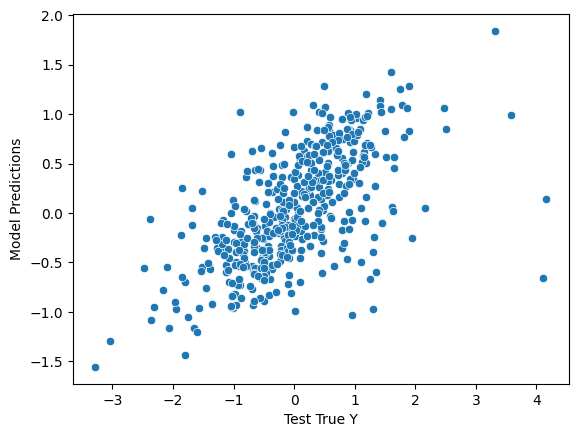

In [44]:
sns.scatterplot(x='Test True Y', y='Model Predictions', data=pred_df)

In [45]:

print("MAE")
print(round(metrics.mean_absolute_error(y_test, test_predictions_table), 2))

print("\nMSE")
print(round(metrics.mean_squared_error(y_test, test_predictions), 2))

print('\nRMSE:')
print(round(np.sqrt(metrics.mean_squared_error(y_test, test_predictions_table)), 2))

y_test_orig = y_scaler.inverse_transform(np.array(y_test).reshape(-1, 1))
test_predictions_orig = y_scaler.inverse_transform(test_predictions.reshape(-1, 1))

rmse = np.sqrt(metrics.mean_squared_error(y_test_orig, test_predictions_orig))
print(f'\nRMSE (original units):\n{rmse:.2f}')

print('\nR-squared:')
print(round(metrics.r2_score(y_test, test_predictions), 2))

print("\nExplained variance score:")
print(round(metrics.explained_variance_score(y_test, test_predictions), 2))

MAE
0.53

MSE
0.57

RMSE:
0.76

RMSE (original units):
20.94

R-squared:
0.39

Explained variance score:
0.4


### Results fo the ANN Model

The R-squared Value is 0.54. with different values and standardizers/normalizers, the value always was between 0.4 and 0.6, which is not very high.
It makes the model not very precise and useful. If you look on the data, I guess it makes sense that it is not possible to predict the cancer death rate per city with these specific variables. There are a lot of variables that dont seem to have a connection with the target varaible and cancer on a lot of individual habbits, lifestyles and pysical characteristics.

### Linear Regression

To compare, if deeplearning or classical ML is better for this specific dataset, I used the lenearmodel from scikit-learn.

Mean squared error: 0.55
R-Squared: 0.41


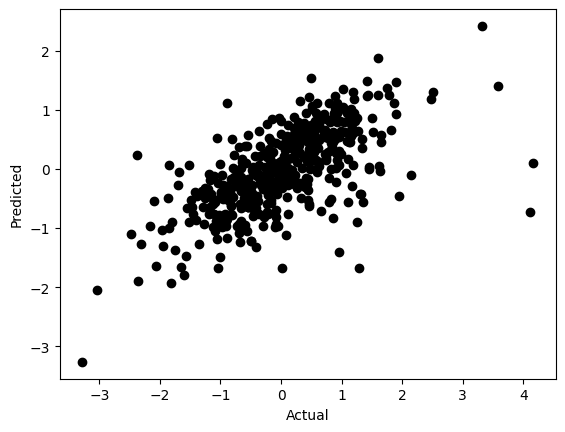

In [46]:
# source: https://scikit-learn.org/1.5/auto_examples/linear_model/plot_ols.html

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score



regr = linear_model.LinearRegression()


regr.fit(X_train, y_train)


y_pred = regr.predict(X_test)


print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

print("R-Squared: %.2f" % r2_score(y_test, y_pred))


# generated by AI: Website only showed a plot for one variable, so I got a ValueError.
# AI gave me a plot that compares every predicted value with the actual value

plt.scatter(y_test, y_pred, color="black")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()



The R-Sqaured Value is just a little bit higher than the R-Sqared form the Deeplearning model. But the difference is not signifcant and both models do not capable
of predicting the data accuratly. 

### Creating a Test Row to make a Prediction

In [47]:
# I used AI t o create a test row and added the modified values by myself

tester_row = {
    'avgAnnCount': 171.0,
    'avgDeathsPerYear': 61,
    'incidenceRate': 453.5494,
    'medIncome': 45207,
    'popEst2015': 26643,
    'povertyPercent': 15.9,
    'studyPerCap': 0.0,
    'binnedInc': 3,
    'MedianAge': 41.0,
    'MedianAgeMale': 39.6,
    'MedianAgeFemale': 42.4,
    'AvgHouseholdSize': 2.6,        
    'Geography_East': 0,
    'Geography_North': 1,
    'Geography_South': 0,
    'Geography_West': 0,             
    'PercentMarried': 52.4,
    'PctNoHS18_24': 17.1,
    'PctHS18_24': 34.7,
    'PctSomeCol18_24': 40.4,
    'PctBachDeg18_24': 5.4,
    'PctHS25_Over': 35.3,
    'PctBachDeg25_Over': 12.3,
    'PctEmployed16_Over': 54.5,
    'PctUnemployed16_Over': 7.6,
    'PctPrivateCoverage': 65.1,
    'PctPrivateCoverageAlone': 48.7,
    'PctEmpPrivCoverage': 41.1,
    'PctPublicCoverage': 36.3,
    'PctPublicCoverageAlone': 18.8,
    'PctWhite': 90.0598,
    'PctBlack': 2.2476,
    'PctAsian': 0.5498,
    'PctOtherRace': 0.8262,
    'PctMarriedHouseholds': 51.6699,
    'BirthRate': 5.3815,
}


# I had some errors because I didnt applied the scaler correctly
# I made a new instance of a StandardScaler and fitted it with the row
# I used AI use the right one and to inverse the prediction scaling

row_df = pd.DataFrame([tester_row])


row_df = row_df.reindex(columns=list(X.columns), fill_value=0)


row_X = x_scaler.transform(row_df.values)  


y_hat_scaled = model.predict(row_X)


y_hat = y_scaler.inverse_transform(np.asarray(y_hat_scaled).reshape(-1, 1)).ravel()

print(y_hat)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[183.64276]


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# I never worked with tkinter before, so I used AI to create a GUI for the prediction
# Since the UI is visual, it is easy to see if the code works or not

import tkinter as tk
from tkinter import ttk, messagebox
import numpy as np
import pandas as pd


feature_names = list(X.columns)  

example_row = {
    'avgAnnCount': 171.0,
    'avgDeathsPerYear': 61,
    'incidenceRate': 453.5494,
    'medIncome': 45207,
    'popEst2015': 26643,
    'povertyPercent': 15.9,
    'studyPerCap': 0.0,
    'binnedInc': 3,
    'MedianAge': 41.0,
    'MedianAgeMale': 39.6,
    'MedianAgeFemale': 42.4,
    'AvgHouseholdSize': 2.6,
    'Geography_East': 0,
    'Geography_North': 1,
    'Geography_South': 0,
    'Geography_West': 0,
    'PercentMarried': 52.4,
    'PctNoHS18_24': 17.1,
    'PctHS18_24': 34.7,
    'PctBachDeg18_24': 5.4,
    'PctHS25_Over': 35.3,
    'PctBachDeg25_Over': 12.3,
    'PctEmployed16_Over': 54.5,
    'PctUnemployed16_Over': 7.6,
    'PctPrivateCoverage': 65.1,
    'PctPrivateCoverageAlone': 48.7,
    'PctEmpPrivCoverage': 41.1,
    'PctPublicCoverage': 36.3,
    'PctPublicCoverageAlone': 18.8,
    'PctWhite': 90.0598,
    'PctBlack': 2.2476,
    'PctAsian': 0.5498,
    'PctOtherRace': 0.8262,
    'PctMarriedHouseholds': 51.6699,
    'BirthRate': 5.3815,
   
}


root = tk.Tk()
root.title("Cancer DeathRate Prediction")

outer = ttk.Frame(root, padding=10)
outer.grid(sticky="nsew")
root.columnconfigure(0, weight=1)
root.rowconfigure(0, weight=1)

canvas = tk.Canvas(outer, borderwidth=0)
scrollbar = ttk.Scrollbar(outer, orient="vertical", command=canvas.yview)
form_frame = ttk.Frame(canvas)

form_frame.bind(
    "<Configure>",
    lambda e: canvas.configure(scrollregion=canvas.bbox("all"))
)
canvas.create_window((0, 0), window=form_frame, anchor="nw")
canvas.configure(yscrollcommand=scrollbar.set)

canvas.grid(row=0, column=0, sticky="nsew")
scrollbar.grid(row=0, column=1, sticky="ns")
outer.columnconfigure(0, weight=1)
outer.rowconfigure(0, weight=1)


vars_by_feat = {}
for idx, feat in enumerate(feature_names):
    r = idx // 2
    c = (idx % 2) * 2  
    ttk.Label(form_frame, text=feat).grid(row=r, column=c, sticky="w", padx=4, pady=3)
    v = tk.StringVar()
    
    if feat in example_row:
        v.set(str(example_row[feat]))
    vars_by_feat[feat] = v
    ttk.Entry(form_frame, textvariable=v, width=18).grid(row=r, column=c+1, sticky="ew", padx=4, pady=3)


result_var = tk.StringVar(value="Prediction: —")
res_label = ttk.Label(outer, textvariable=result_var, font=("Segoe UI", 11, "bold"))
res_label.grid(row=1, column=0, sticky="w", pady=(8, 0))

def on_predict():
    try:
       
        data = {}
        for feat in feature_names:
            s = vars_by_feat[feat].get().strip()
            if s == "":
               
                data[feat] = 0.0
            else:
              
                data[feat] = float(s)

        row_df = pd.DataFrame([data])
    
        row_df = row_df.reindex(columns=feature_names, fill_value=0.0)

        
        row_X = x_scaler.transform(row_df.values) 

        y_pred_scaled = model.predict(row_X)

        try:
            y_pred = y_scaler.inverse_transform(np.asarray(y_pred_scaled).reshape(-1, 1)).ravel()
        except Exception:
        
            y_pred = np.asarray(y_pred_scaled).ravel()

        result_var.set(f"Prediction (TARGET_deathRate): {y_pred[0]:.2f}")
    except Exception as e:
        messagebox.showerror("Error", str(e))

btns = ttk.Frame(outer)
btns.grid(row=2, column=0, sticky="ew", pady=8)
ttk.Button(btns, text="Predict", command=on_predict).grid(row=0, column=0, padx=4)
ttk.Button(btns, text="Quit", command=root.destroy).grid(row=0, column=1, padx=4)

root.mainloop()
